- A04.1 Community-detection
    - 1 Clauset Newman
    - 2 Girvan-Newman
    - 3 comparison
- A04.2 Erdos Renyi random networks
    - 1 change average degree
    - 2 change p
- A04.3 Small world with high clustering

In [409]:
import networkx as nx
import networkx.algorithms.community as nxcom
from networkx.algorithms.community.centrality import girvan_newman
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# A04.1 Community detection

In [76]:
# define color
color = [
"#E52B50","#FFBF00","#9966CC","#FBCEB1","#7FFFD4","#007FFF","#89CFF0","#F5F5DC",
"#CB4154","#000000","#0000FF","#0095B6","#8A2BE2","#DE5D83","#CD7F32","#993300",
"#800020","#702963","#960018","#DE3163","#007BA7","#F7E7CE","#7FFF00","#7B3F00",
"#0047AB","#6F4E37","#B87333","#FF7F50",]


# read data
data_path = '/Users/luojiayu/Downloads/semester1/Network Science/Assignments/Assignment4/data/'

name_list = [
    'graph_dolphins',
    'graph_jazz_collab',
    'graph_karate'
]
all_graph = dict()

for name in name_list:
    graph_real = nx.read_gml(data_path+name+".gml")
    
#     # read random graph 
#     graph_random = nx.read_gml(data_path+name+"_random.gml")
    
    # generate random graph
    graph_random = nx.algorithms.smallworld.random_reference(graph_real)
    
    all_graph[name] = [graph_real, graph_random]
    


### 1 Clauset Newman

In [424]:
def get_color_community(algorithm, graph_name, graph_type): 
    color_map = dict()
    
    graph_i =0 if graph_type =='real' else 1
    G = all_graph[graph_name][graph_i]
    
    if algorithm=='Clauset Newman':
        communities_list = list(nxcom.label_propagation_communities(G))
#     if algorithm=='Girvan Newman':
#         comp = girvan_newman(G)
#         communities_list = list(sorted(c) for c in next(comp))
    
    print('communities number: ', len(communities_list))
    for i in range(len(communities_list)):
        nodes_list = list(communities_list[i])
        for node in nodes_list:
            G.nodes[node]['color'] = color[i]
    return G

#### (1) graph_dolphins

communities number:  6


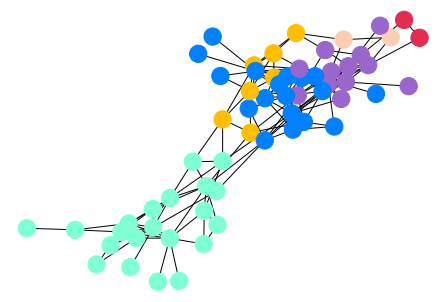

In [425]:
G = get_color_community('Clauset Newman', 'graph_dolphins', 'real')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])

communities number:  2


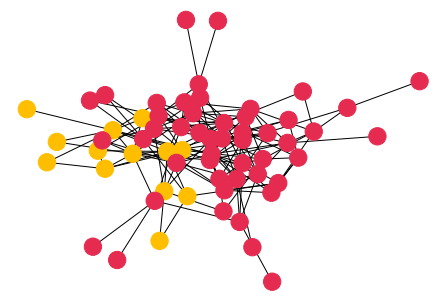

In [426]:
G = get_color_community('Clauset Newman', 'graph_dolphins','random')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])

#### (2) graph_jazz_collab

communities number:  3


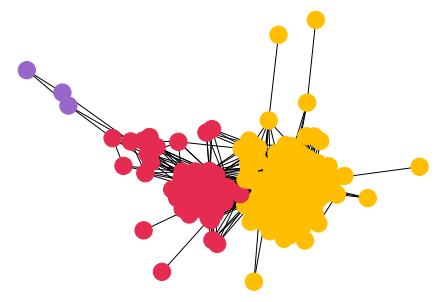

In [429]:
G = get_color_community('Clauset Newman', 'graph_jazz_collab','real')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])


communities number:  1


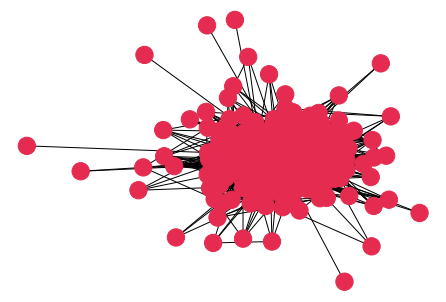

In [430]:
G = get_color_community('Clauset Newman', 'graph_jazz_collab','random')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])

#### (3) graph_karate

communities number:  3


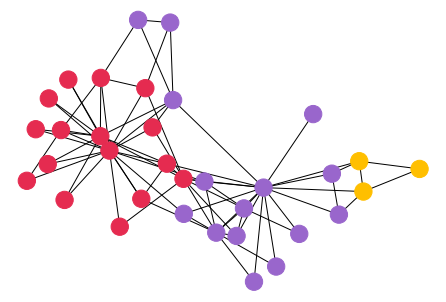

In [433]:
G = get_color_community('Clauset Newman', 'graph_karate','real')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])

communities number:  2


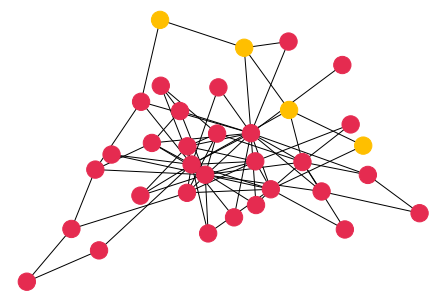

In [434]:
G = get_color_community('Clauset Newman', 'graph_karate','random')
nx.draw(G, node_color = [G.nodes[v]['color'] for v in G.nodes()])

### 2 girvan_newman

In [623]:
def calculate_modularity(graph_name, graph_type, iteration): 
    color_map = dict()
#     iteration = 20
    best_modularity = -1
    best_communities_number = -1
    
    graph_i =0 if graph_type =='real' else 1
    G = all_graph[graph_name][graph_i]
    
    comp = girvan_newman(G)
    
    for communities in itertools.islice(comp, iteration):
        
        communities_list = list(sorted(c) for c in communities)
        current_modularity = nxcom.modularity(G, communities_list)
        
        if current_modularity>best_modularity:
            best_modularity = current_modularity
            best_communities_number = len(communities_list)
            
            # print('%-15s %-10s %-20s %-15s'%(graph_name, graph_type, best_communities_number, best_modularity))
            
            # color node
            for i in range(len(communities_list)):
                nodes_list = list(communities_list[i])
                for node in nodes_list:
                    G.nodes[node]['color'] = color[i] 
    print('%-15s %-10s %-20s %-15s'%(graph_name, graph_type, best_communities_number, best_modularity))
    return G

graph_name      graph_type communities_number   best_modularity
graph_dolphins  real       5                    0.5193821446936434
graph_dolphins  random     15                   0.28942684229263077


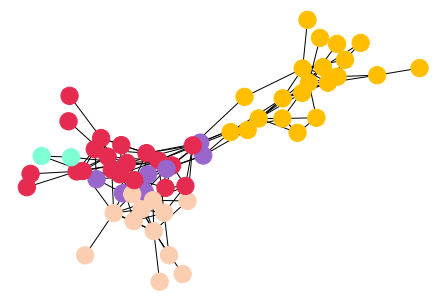

In [603]:
print('%-15s %-10s %-20s %-15s'%('graph_name', 'graph_type', 'communities_number', 'best_modularity'))

G_real = calculate_modularity('graph_dolphins','real',100)
G_random = calculate_modularity('graph_dolphins','random',100)

# draw
nx.draw(G_real, node_color = [G_real.nodes[v]['color'] for v in G_real.nodes()])

graph_name      graph_type communities_number   best_modularity
graph_jazz_collab real       14                   0.28620764550251876
graph_jazz_collab random     17                   0.0006596339407365714


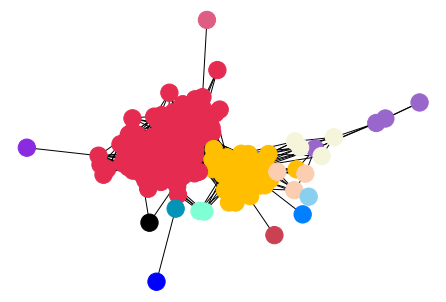

In [624]:
print('%-15s %-10s %-20s %-15s'%('graph_name', 'graph_type', 'communities_number', 'best_modularity'))

G_real = calculate_modularity('graph_jazz_collab','real',30)
G_random = calculate_modularity('graph_jazz_collab','random',30)

# draw
nx.draw(G_real, node_color = [G_real.nodes[v]['color'] for v in G_real.nodes()])

graph_name      graph_type communities_number   best_modularity
graph_karate    real       5                    0.40129848783694944
graph_karate    random     8                    0.15927021696252464


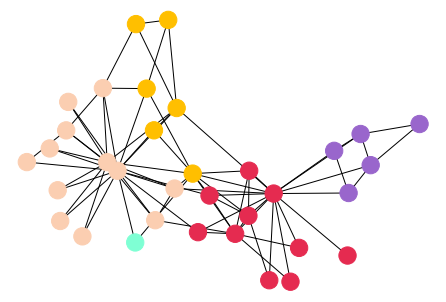

In [618]:
print('%-15s %-10s %-20s %-15s'%('graph_name', 'graph_type', 'communities_number', 'best_modularity'))

G_real = calculate_modularity('graph_karate','real',100)
G_random = calculate_modularity('graph_karate','random',100)

# draw
nx.draw(G_real, node_color = [G_real.nodes[v]['color'] for v in G_real.nodes()])

### 3 comparison

**communities comparison**  


||Clauset(real)|Clauset(random)|Girvan(real)|Girvan(random)|
|--|--|--|--|--|
|graph_dolphins|6|2|5|15|
|graph_jazz_collab|3|1|14|17|
|graph_karate|3|2|5|8|

# A04.2 Erdos-Renyi random networks

### 1 change average degree

In the 𝐺(𝑛,𝑝) model, the expected average degree is 𝑛𝑝. The actual average degree has normal distribution with mean 𝑛𝑝 and standard deviation √2(1−1𝑛)𝑝(1−𝑝), so it is pretty close to 𝑛𝑝 with high probability.

<k> =  0.3


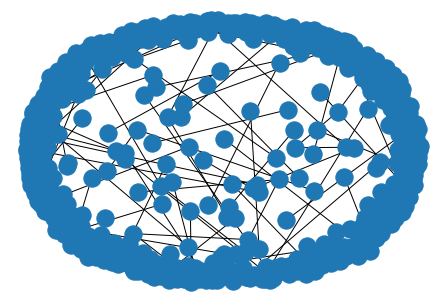

In [470]:
# <k> = 0.3
G = nx.erdos_renyi_graph(n=500, p=0.0006, seed = 3)
# nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G, k=0.5))
print('<k> = ', round(np.mean([degree for label, degree in G.degree()]),2))

<k> =  1.0


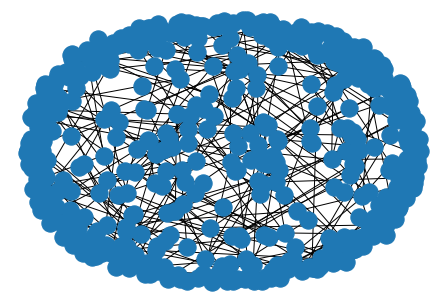

In [469]:
# <k> = 1
G = nx.erdos_renyi_graph(n=500, p=0.002, seed = 34)
# nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G, k=0.5))
print('<k> = ', round(np.mean([degree for label, degree in G.degree()]),3))

<k> =  2.5


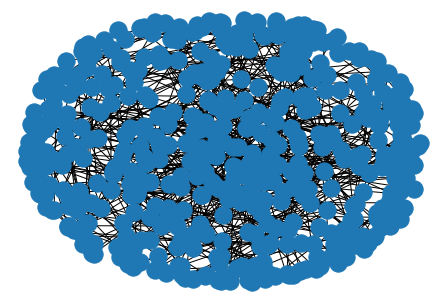

In [627]:
# <k> = 2.5
G = nx.erdos_renyi_graph(n=500, p=0.005, seed = 35)
# nx.draw(G)
nx.draw(G,pos=nx.spring_layout(G, k=0.5))
print('<k> = ', round(np.mean([degree for label, degree in G.degree()]),3))

### 2 change p

[Text(0.5, 0, 'log(p)'), Text(0, 0.5, 'Average Clustering')]

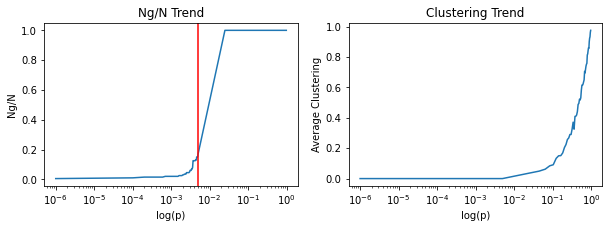

In [599]:
from networkx.algorithms import approximation

node = 200

p_list = list(np.arange(0.000001, 1/node, 1/node/50))\
                +list(np.arange(1/node, 1, (1-1/node)/50))

connected_rate = list()
clustering_rate = list()
for p in p_list:
    G = nx.erdos_renyi_graph(n=node, p=p, seed = 3)
    connected_rate.append(len(sorted(nx.connected_components(G), key=len, reverse=True)[0])/node)
    clustering_rate.append(approximation.average_clustering(G, seed=1))
    
fig, axes = plt.subplots(ncols = 2, figsize=(10, 3)) 

# axes[0].scatter(x=np.log(p_list), y=connected_rate, edgecolors='k', alpha=0.3,)
# axes[0].axvline(np.log(1/node), 0, 1, color='r')

# axes[1].scatter(x=np.log(p_list), y=clustering_rate, edgecolors='k', alpha=0.3,)
# axes[1].axvline(np.log(1/node), 0, 1, color='r')

axes[0].plot(p_list, connected_rate)
axes[0].set_xscale('log')
axes[0].axvline(1/node, 0, 1, color='r')
axes[0].set_title('Ng/N Trend')
axes[0].set(xlabel='log(p)', ylabel='Ng/N')

axes[1].plot(p_list, clustering_rate)
axes[1].set_xscale('log')
axes[1].set_title('Clustering Trend')
axes[1].set(xlabel='log(p)', ylabel='Average Clustering')


**largestconnected component ⟨NG/N⟩**  
if p =0, then <k> ~ 0, NG ~ 0, NG/N = 0  
if p=1, then <k> ~ N, NG ~ N, ,NG/N = 1  
If np < 1, then a graph in G(n, p) will almost surely have no connected components of size larger than O(log(n))
          
**average clustering**   
When p increases, np (average degree) and clustering rate increase


# A04.3 Small-world with high clustering

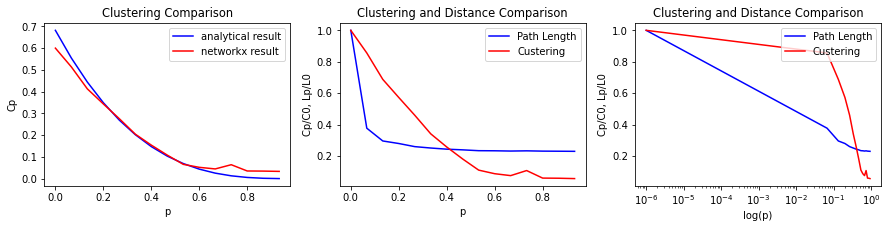

In [559]:
from scipy.interpolate import make_interp_spline

p_list = list(np.arange(0.000001, 1, 1/15))

# p_list = list(np.arange(0.0, 0.0001, 0.00001))+list(np.arange(0.0001, 0.2, 0.005))\
#                 +list(np.arange(0.2, 1, 0.01))
# print(np.log(p_list))

clustering_analytical = list()
clustering_nx = list()
clustering_rate = list()
short_path_rate = list()

k = 6
node = 150
for p in p_list: 
    
    G = nx.connected_watts_strogatz_graph(node, k, p)
    
    if p ==0:
        C0 = nx.average_clustering(G)
        D0 = nx.average_shortest_path_length(G)
        
    clustering_analytical.append((3/2)*((k-1)*(1-p)**3)/(2*k-1))
    clustering_nx.append(nx.average_clustering(G))
    clustering_rate.append(nx.average_clustering(G)/C0)
    short_path_rate.append(nx.average_shortest_path_length(G)/D0)

fig, axes = plt.subplots(ncols = 3, figsize=(15, 3)) 

axes[0].plot(p_list, clustering_analytical, 'b-', label="analytical result")
axes[0].plot(p_list, clustering_nx, 'r-', label="networkx result")
axes[0].set(xlabel='p', ylabel='Cp')
axes[0].set_title('Clustering Comparison', fontdict = {'fontsize' : 11.5})
axes[0].legend(loc="upper right")

axes[1].plot(p_list, short_path_rate, 'b-', label="Path Length")
axes[1].plot(p_list, clustering_rate, 'r-', label="Custering")
axes[1].set(xlabel='p',ylabel = 'Cp/C0, Lp/L0')
axes[1].set_title('Clustering and Distance Comparison', fontdict = {'fontsize' : 11.5})
axes[1].legend(loc="upper right")

axes[2].plot(p_list, short_path_rate, 'b-', label="Path Length")
axes[2].plot(p_list, clustering_rate, 'r-', label="Custering")
axes[2].set_xscale('log')
axes[2].set(xlabel='log(p)',ylabel = 'Cp/C0, Lp/L0')
axes[2].set_title('Clustering and Distance Comparison', fontdict = {'fontsize' : 11.5})
axes[2].legend(loc="upper right")
